In [ ]:
import os, sys

os.getcwd()

In [1]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "ftse" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("MCResultCSVs/maxclique_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("MCResultCSVs/maxclique_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [ ]:
assert quant_res_df.shape == class_res_df.shape and quant_res_df.columns.equals(class_res_df.columns)

In [ ]:
quant_res_df.shape

In [ ]:
quant_res_df.valid_clique.sum()

In [ ]:
class_res_df.valid_clique.sum()

In [ ]:
quant_res_df.columns

In [ ]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=thresh_array)
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

In [ ]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & (quant_res_df.valid_soln == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & (class_res_df.valid_soln == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=0.5)
    plt.subplots(figsize=(20,5))
    
    plt.subplot(121)
    plt.title('Max Ind Set, %s, thresh = %f' % (dataset, thresh))
    plt.ylabel('Ind. Set Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series['set_size'], 'r--', label='Quant Alg')
    plt.plot(class_series['set_size'], 'b--', label='Class Alg')
    plt.legend(loc=0)
    
    plt.subplot(122)
    plt.title('%s Graph Density vs Time, thresh=%f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    
    plt.savefig('../ReportFiguresPlots/MaxIndSet/%s_score_density_time_thresh_%f.png' % (dataset, thresh))
    
    i += 1

In [6]:
datasets = ["sectors", "ftse", "asset_class"]

quant_dfs = []
class_dfs = []

for d in datasets:
    qdf = pd.read_csv("ISResultCSVs/indset_quant_%s_res.csv" % (d))
    cdf = pd.read_csv("ISResultCSVs/indset_class_%s_res.csv" % (d))
    
    quant_dfs.append(qdf)
    class_dfs.append(cdf)

all_quant_df = pd.concat(quant_dfs)
all_class_df = pd.concat(class_dfs)

In [7]:
all_quant_df = all_quant_df.groupby(["density"])["set_size"].mean()
all_class_df = all_class_df.groupby(['density'])['set_size'].mean()

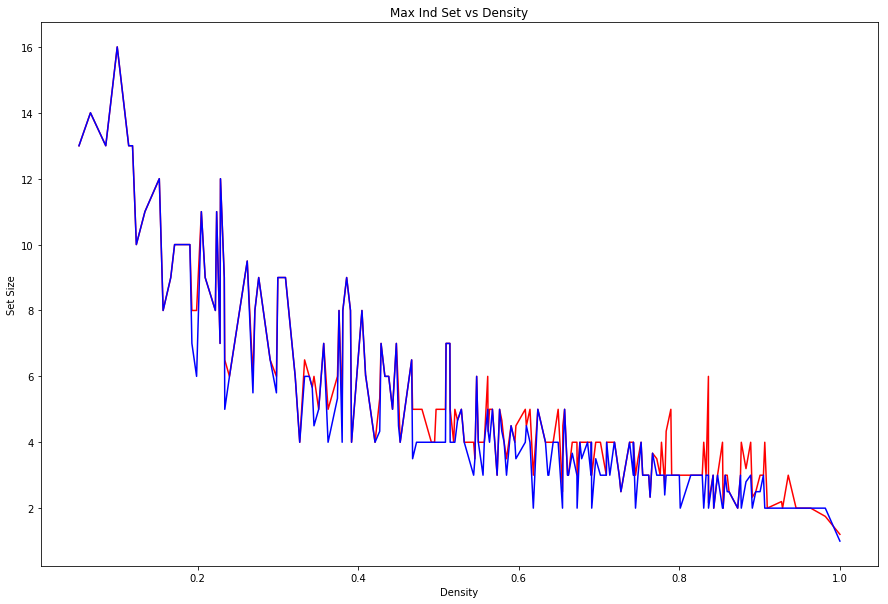

In [8]:
plt.figure(1, figsize=(15,10))
plt.plot(all_quant_df, 'r')
plt.plot(all_class_df, 'b')
plt.title("Max Ind Set vs Density")
plt.ylabel("Set Size")
plt.xlabel("Density")
plt.show()